In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [117]:
adata = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/250830_generated_cells.h5ad")

Add var names 

In [25]:
adata_var = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/cellfeaturization_results_tonsilitis.h5ad")

In [119]:
var_to_keep = []

for var in adata_var.var.index:
    if "mean" in var:
        var_to_keep.append(var)

In [120]:
adata.var.index = var_to_keep

In [121]:
adata.var

""
DAPI_mean_nucleus
CD45_mean_nucleus
FoxP3_mean_nucleus
HLA-DR_mean_nucleus
CD103_mean_nucleus
CHGA_mean_nucleus
EGFR_mean_nucleus
CD206_mean_nucleus
GFAP_mean_nucleus
PD-1_mean_nucleus


## Keep only the intersections 

In [122]:
adata_var = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/cellfeaturization_results_tonsilitis_processed_std.h5ad")

In [123]:
adata_var.var

,feature_name
stain_names,
CCR7,CCR7_mean_nucleus
CD103,CD103_mean_nucleus
CD11b,CD11b_mean_nucleus
CD11c,CD11c_mean_nucleus
CD138,CD138_mean_nucleus
CD15,CD15_mean_nucleus
CD16,CD16_mean_nucleus
CD163,CD163_mean_nucleus
CD20,CD20_mean_nucleus


In [124]:
adata = adata[:, adata_var.var["feature_name"]]

## Check plausibility - subset

In [125]:
adata_ref_non_std = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/cellfeaturization_results_tonsilitis_processed_std.h5ad")
adata_ref_std = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/cellfeaturization_results_tonsilitis_processed.h5ad")

In [126]:
adata_ref_non_std

AnnData object with n_obs × n_vars = 19784 × 31
    obs: 'scportrait_cell_id', 'region', 'shared_leiden_cluster_id'
    var: 'feature_name'
    uns: 'spatialdata_attrs'

In [34]:
def plot_gen_and_real(adata_ref, adata_true):
    X = np.concatenate([adata_ref.X, adata_true.X])
    obs = {"annot": ["generated" for _ in range(len(adata_ref))]+["true" for _ in range(len(adata_true))]}
    adata_joint = sc.AnnData(X=X, obs=pd.DataFrame(obs))
    sc.tl.pca(adata_joint)
    sc.pp.neighbors(adata_joint)
    sc.tl.umap(adata_joint)
    sc.pl.umap(adata_joint, color="annot")

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


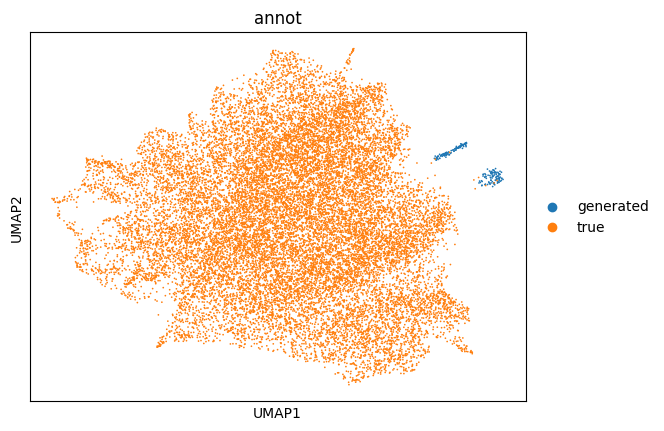

In [128]:
plot_gen_and_real(adata, adata_ref_non_std)

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


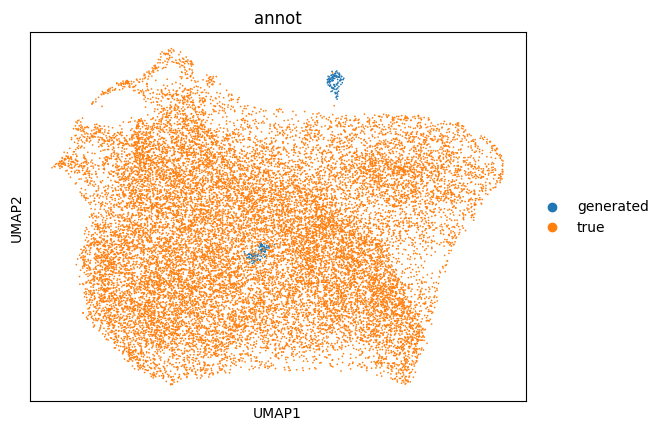

In [129]:
plot_gen_and_real(adata, adata_ref_std)

## Check plausibility - not subset

In [130]:
adata = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/250830_generated_cells.h5ad")
adata_ref = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/cellfeaturization_results_tonsilitis.h5ad")

In [131]:
adata_ref = adata_ref[:, var_to_keep]

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


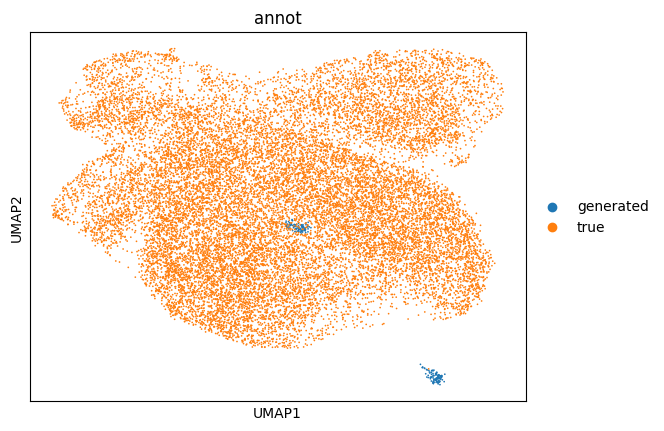

In [132]:
plot_gen_and_real(adata, adata_ref)

# Plot features 

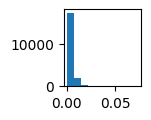

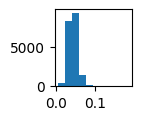

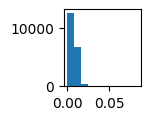

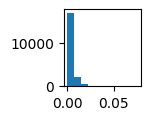

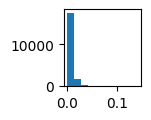

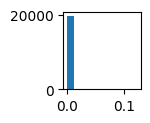

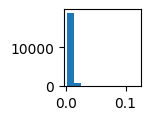

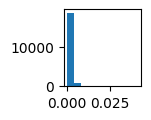

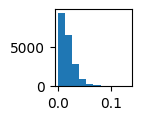

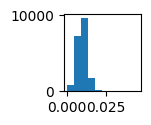

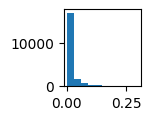

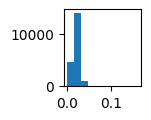

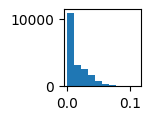

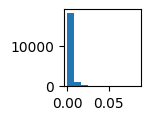

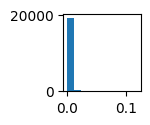

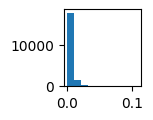

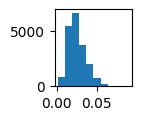

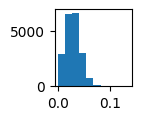

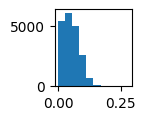

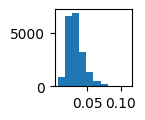

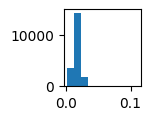

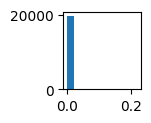

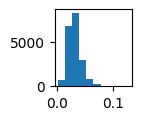

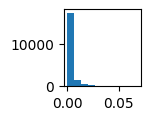

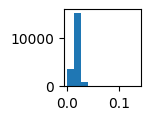

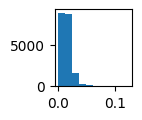

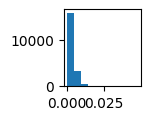

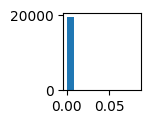

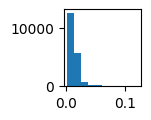

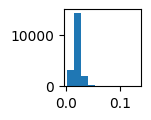

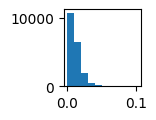

In [133]:
for feat in range(adata_ref_std.X.shape[1]):
    plt.figure(figsize=(1, 1))
    plt.hist(adata_ref_std.X[:, feat])
    plt.show()

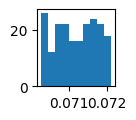

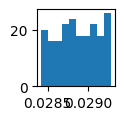

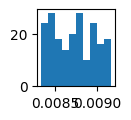

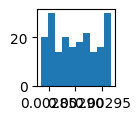

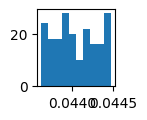

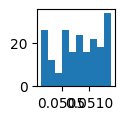

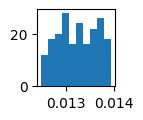

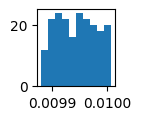

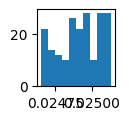

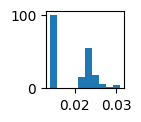

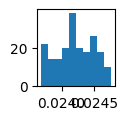

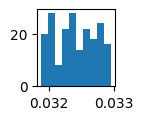

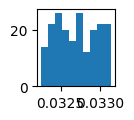

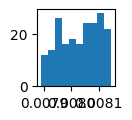

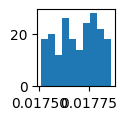

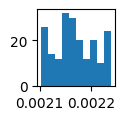

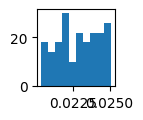

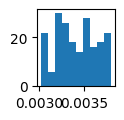

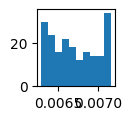

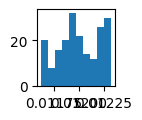

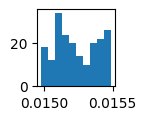

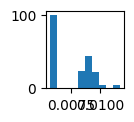

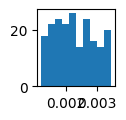

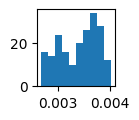

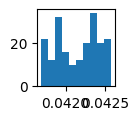

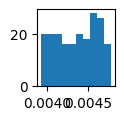

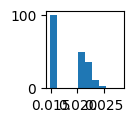

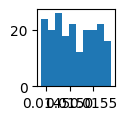

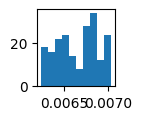

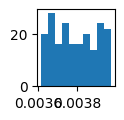

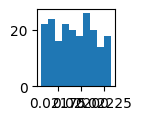

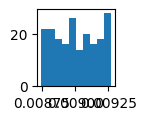

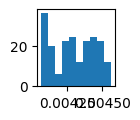

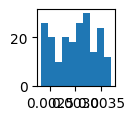

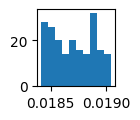

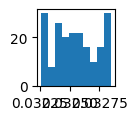

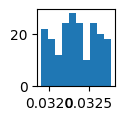

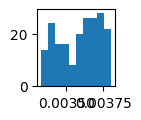

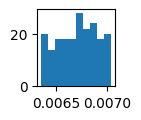

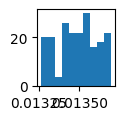

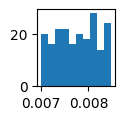

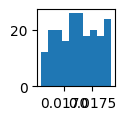

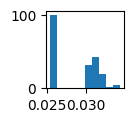

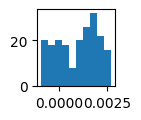

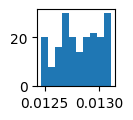

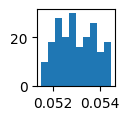

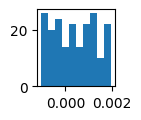

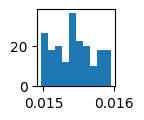

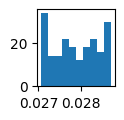

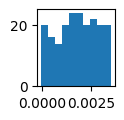

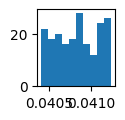

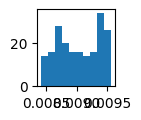

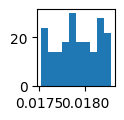

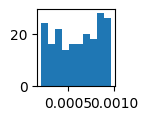

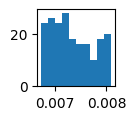

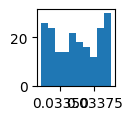

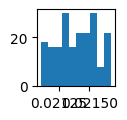

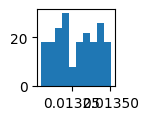

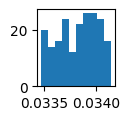

In [134]:
for feat in range(adata.X.shape[1]):
    plt.figure(figsize=(1, 1))
    plt.hist(adata.X[:, feat])
    plt.show()

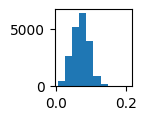

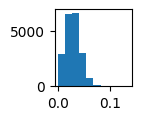

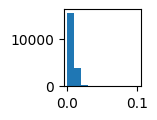

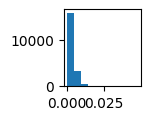

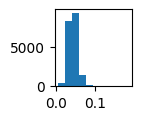

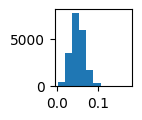

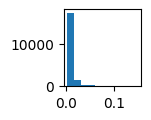

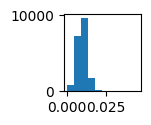

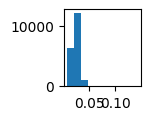

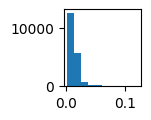

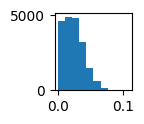

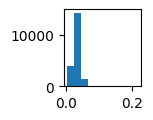

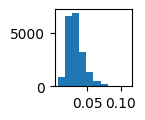

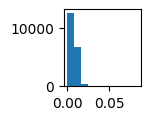

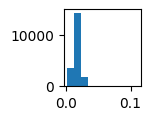

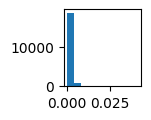

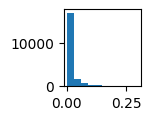

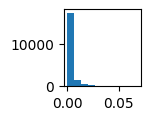

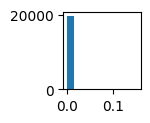

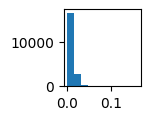

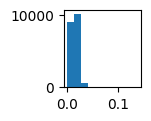

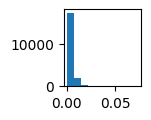

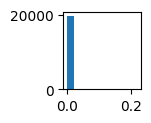

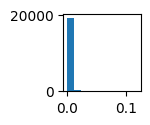

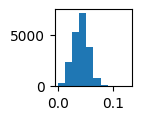

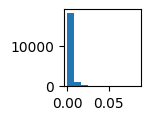

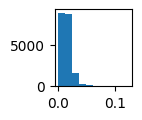

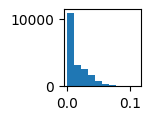

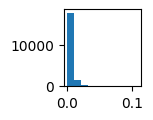

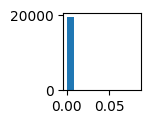

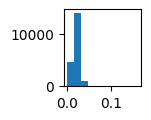

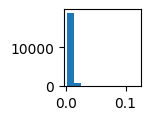

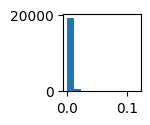

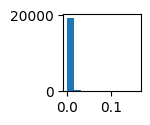

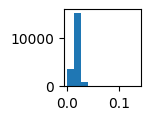

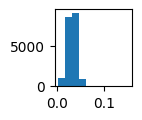

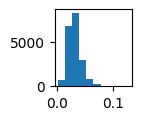

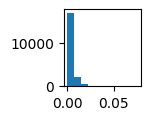

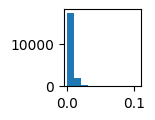

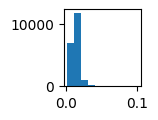

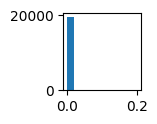

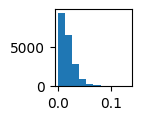

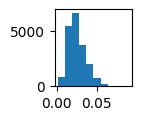

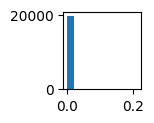

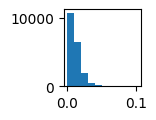

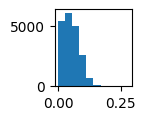

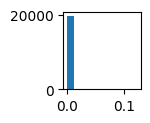

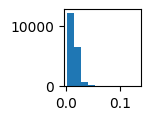

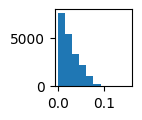

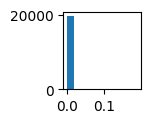

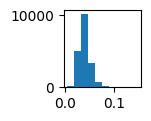

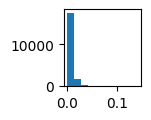

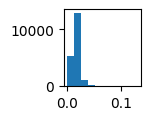

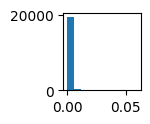

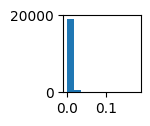

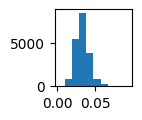

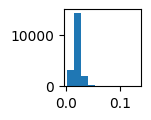

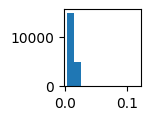

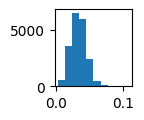

In [135]:
for feat in range(adata_ref.X.shape[1]):
    plt.figure(figsize=(1, 1))
    plt.hist(adata_ref.X[:, feat])
    plt.show()

## Preprocess generated features 

In [38]:
from sklearn import preprocessing

In [39]:
adata_var = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/cellfeaturization_results_tonsilitis.h5ad")

var_to_keep = []

for var in adata_var.var.index:
    if "mean" in var:
        var_to_keep.append(var)

In [40]:
tonsilitis_codex_cite = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/cellfeaturization_results_tonsilitis_processed.h5ad")

In [41]:
tonsilitis_codex_cite.var

,feature_name
stain_names,
CCR7,CCR7_mean_nucleus
CD103,CD103_mean_nucleus
CD11b,CD11b_mean_nucleus
CD11c,CD11c_mean_nucleus
CD138,CD138_mean_nucleus
CD15,CD15_mean_nucleus
CD16,CD16_mean_nucleus
CD163,CD163_mean_nucleus
CD20,CD20_mean_nucleus


In [42]:
generated_adata = sc.read_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/250830_generated_cells.h5ad")
generated_adata.var.index = var_to_keep

generated_adata = generated_adata[:, tonsilitis_codex_cite.var.feature_name]

In [43]:
scaler = preprocessing.StandardScaler()
scaler.fit(tonsilitis_codex_cite.X)

StandardScaler()

In [44]:
generated_adata.X = scaler.transform(generated_adata.X)

/home/icb/alessandro.palma/miniconda3/envs/sc_exp_design/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


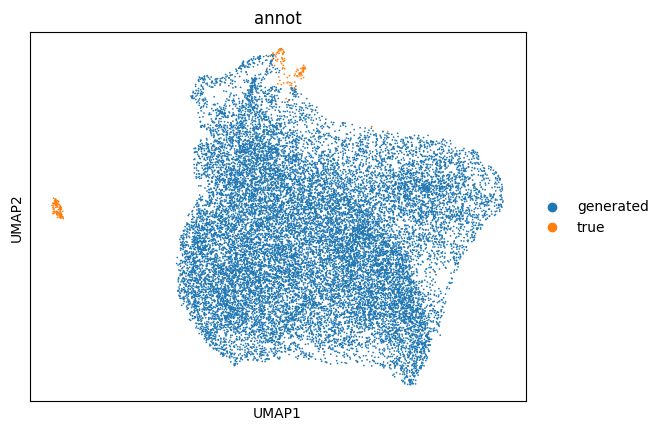

In [45]:
plot_gen_and_real(tonsilitis_codex_cite, generated_adata)

In [46]:
generated_adata.write_h5ad("/home/icb/alessandro.palma/environment/scportrait_ot/project_folder/data/codex/citeseq/250830_generated_cells_processed.h5ad")